In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
data = pd.read_csv("/content/drive/MyDrive/train_u6lujuX_CVtuZ9i.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
data.shape

(614, 13)

In [8]:
type(data)

pandas.core.frame.DataFrame

In [9]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#Data Preprocessing
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [12]:
LoanAmountMean = data["LoanAmount"].mean()
Loan_Amount_Term = data["Loan_Amount_Term"].mean()
data["LoanAmount"] = data["LoanAmount"].fillna(LoanAmountMean)
data["Loan_Amount_Term"] = data["Loan_Amount_Term"].fillna(Loan_Amount_Term)
data["Credit_History"] =  data["Credit_History"].fillna(0.1)

In [13]:

data["Gender"] = data["Gender"].fillna(data["Gender"].mode()[0])
data["Married"] = data["Married"].fillna(data["Married"].mode()[0])
data["Dependents"] = data["Dependents"].fillna(data["Dependents"].mode()[0])
data["Self_Employed"] = data["Self_Employed"].fillna(data["Self_Employed"].mode()[0])

In [14]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:

# ApplicantIncome and CoapplicantIncome can be combined together 
# so we are adding these two columns and making a new column called TotalIncome
# and we will drop ApplicantIncome and CoapplicantIncome columns
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
cols = ["ApplicantIncome" , "CoapplicantIncome"]
data.drop(cols,axis=1,inplace=True)


In [16]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.000000,360.0,1.0,Urban,Y,6000.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


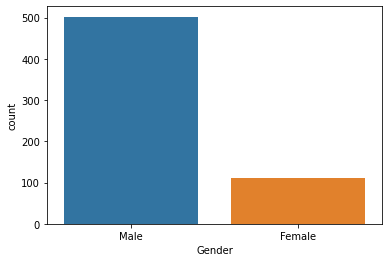

In [17]:
#EDA

#categorical attriburtes visualization

sns.countplot(data["Gender"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


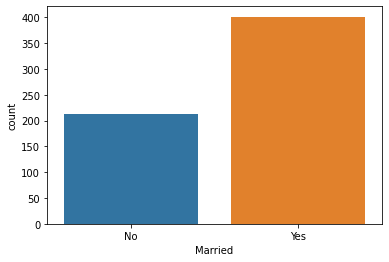

In [18]:
sns.countplot(data["Married"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


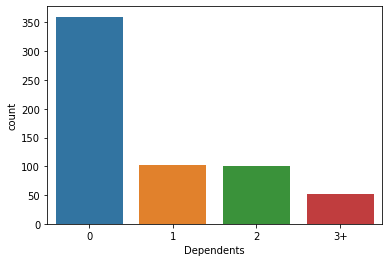

In [19]:

sns.countplot(data["Dependents"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


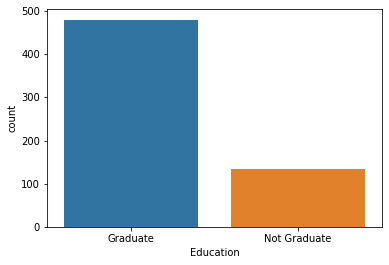

In [20]:
sns.countplot(data["Education"])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


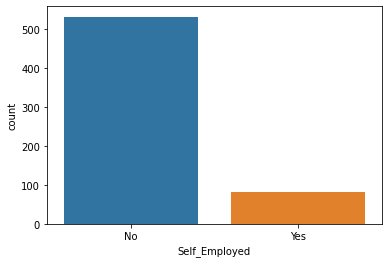

In [21]:


sns.countplot(data["Self_Employed"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


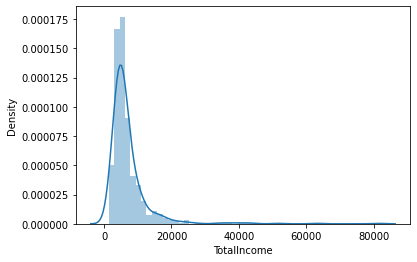

In [22]:
# numerical attributes visualization
sns.distplot(data["TotalIncome"])

In [23]:
#MAjority of the TotalIncome of applicants is between 0-10,000 , only few are from 20,000 onwards. graph is left skewed i.e most of the applicants are on the left side which is not a good distribution for training the model.so we will apply the log function in the column to normalize the attribute and make a bell curve.

#f you see the graph "left skewed or right skewed", you can apply

#log transformation
#Min-Max Normalization
#Standarization These are the common techniques to normalize the distribution in order to train the model better.



In [24]:
# apply log transformation to the attribute
data["TotalIncome"] = np.log(data["TotalIncome"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


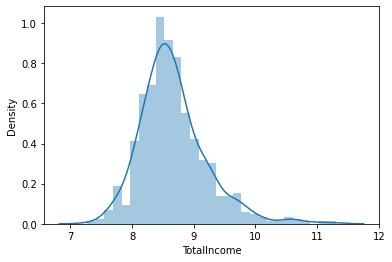

In [25]:
sns.distplot(data["TotalIncome"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


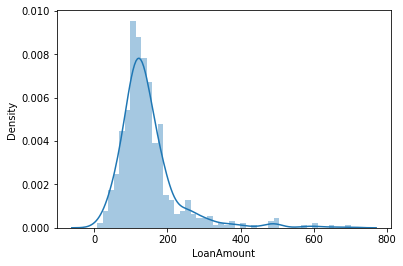

In [26]:
sns.distplot(data["LoanAmount"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


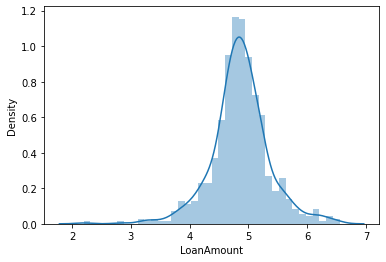

In [27]:
#so the distribution for LoanAmount is also left skewed. we will apply log transformation here as well.
#apply log tranformation
import numpy as np
data["LoanAmount"] = np.log(data["LoanAmount"])
sns.distplot(data["LoanAmount"])



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


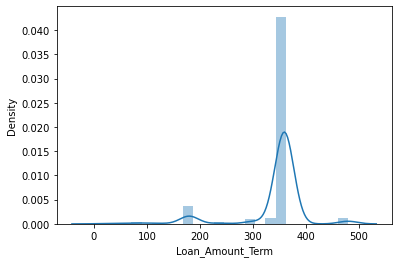

In [28]:
sns.distplot(data["Loan_Amount_Term"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


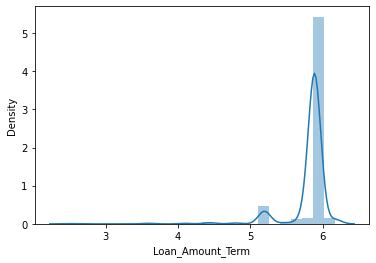

In [29]:
data["Loan_Amount_Term"] = np.log(data["Loan_Amount_Term"])
sns.distplot(data["Loan_Amount_Term"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


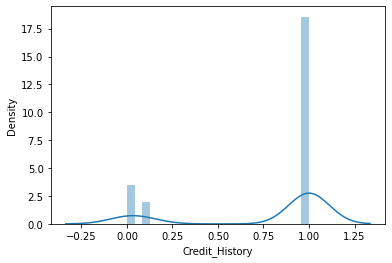

In [30]:
sns.distplot(data["Credit_History"])

In [31]:
#Correlation Matrix
corr = data.corr()

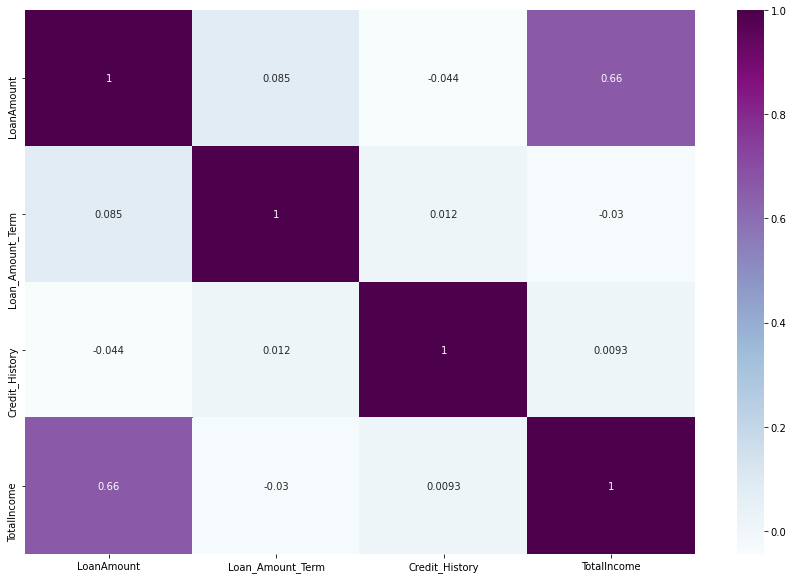

In [32]:
plt.figure(figsize=(15,10))
sns.heatmap(corr , annot= True , cmap="BuPu")

In [33]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,4.986426,5.886104,1.0,Urban,Y,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4.852030,5.886104,1.0,Rural,N,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,4.189655,5.886104,1.0,Urban,Y,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,4.787492,5.886104,1.0,Urban,Y,8.505323
4,LP001008,Male,No,0,Graduate,No,4.948760,5.886104,1.0,Urban,Y,8.699515


In [34]:
#Label Encoder
#Apply LableEncoder on caterocial columns
from sklearn.preprocessing import LabelEncoder
cols = ['Gender' , 'Married', 'Education', 'Self_Employed', 'Property_Area' ,'Loan_Status','Dependents']
le = LabelEncoder()
for col in cols:
  data[col] = le.fit_transform(data[col])


In [35]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,1,0,0,0,0,4.986426,5.886104,1.0,2,1,8.674026
1,LP001003,1,1,1,0,0,4.852030,5.886104,1.0,0,0,8.714568
2,LP001005,1,1,0,0,1,4.189655,5.886104,1.0,2,1,8.006368
3,LP001006,1,1,0,1,0,4.787492,5.886104,1.0,2,1,8.505323
4,LP001008,1,0,0,0,0,4.948760,5.886104,1.0,2,1,8.699515


In [36]:
data = data.drop(columns=["Loan_ID"],axis = 1)

In [37]:
#Train Test Split|
X = data.drop(columns=["Loan_Status"],axis = 1)
Y = data["Loan_Status"]

In [38]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size= 0.25,random_state=42)

In [40]:
type(x_train)

pandas.core.frame.DataFrame

In [41]:
x_train.shape

(460, 10)

In [42]:
x_test.shape

(154, 10)

In [43]:
type(y_train)

pandas.core.series.Series

In [44]:
y_test.shape

(154,)

In [45]:
y_train.shape

(460,)

In [46]:
#Model Training
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
print("Accuracy is",model.score(x_test,y_test)*100)
score = cross_val_score(model,X,Y,cv=5)
print("cross vaalidation is" ,np.mean(score)*100)

Accuracy is 75.97402597402598
cross vaalidation is 77.20378515260563


In [47]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print("Acuracy is",model.score(x_test,y_test)*100)
score = cross_val_score(model,X,Y,cv=5)
print("cross validation", np.mean(score)*100)


Acuracy is 70.12987012987013
cross validation 69.8720511795282


In [49]:
param_dist= {"criterion":["gini","entropy"],
             "max_depth" :[1,2,3,4,5,6,7,8,None]}

In [50]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(model,param_grid=param_dist,cv=10 ,n_jobs=-1)



In [51]:
grid.fit(x_train,y_train) 

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                    

In [52]:
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [53]:
grid.best_score_

0.826086956521739

In [54]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': 3}

In [55]:
grid.best_index_

11

In [56]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
print("Accuracy is",model.score(x_test,y_test)*100)
score = cross_val_score(model,X,Y,cv=5)
print("cross validation",np.mean(score)*100)


Accuracy is 77.27272727272727
cross validation 77.36372117819539


In [57]:
# Let`s fine tune the hyper parameters of RandomForest 
model = RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)
model.fit(x_train,y_train)
print("Accuracy is",model.score(x_test,y_test)*100)
score = cross_val_score(model,X,Y,cv=5)
print("cross validation",np.mean(score)*100)



Accuracy is 77.27272727272727
cross validation 81.11022257763561


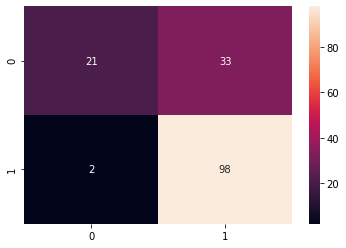

In [58]:
#confusion matrix
from sklearn.metrics import confusion_matrix
y_predicted = model.predict(x_test)
cm = confusion_matrix(y_test,y_predicted)
sns.heatmap(cm,annot=True)